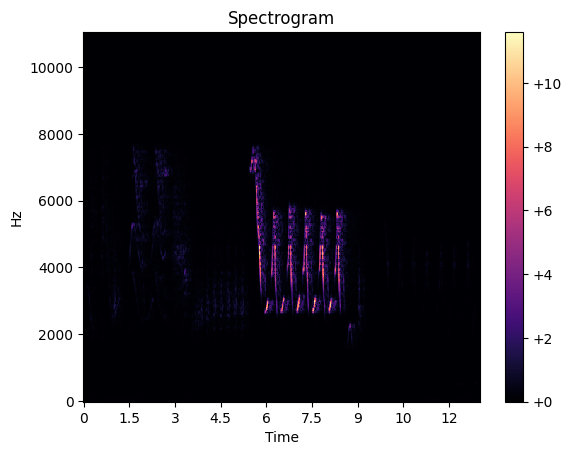

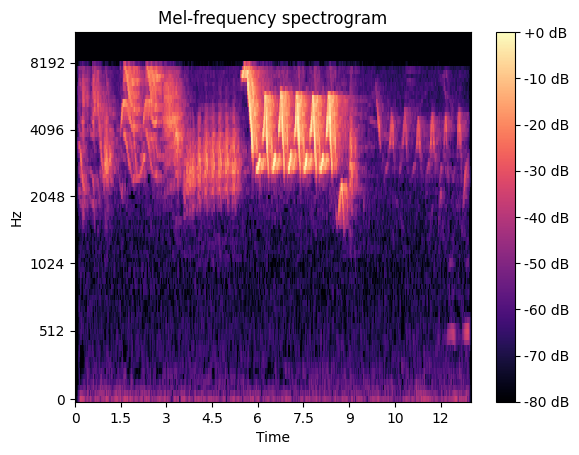

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import librosa.feature

# file loading
y, sr = librosa.load("audio_16k/bird-sing.wav")

WINDOW_SIZE = 512

# STFT
Y = librosa.stft(y=y, n_fft=WINDOW_SIZE) # coeff_per_freq, n_windows
fig, ax = plt.subplots()
img = librosa.display.specshow(np.abs(Y), x_axis='time', y_axis='linear', sr=sr, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f')
ax.set(title='Spectrogram')

# Mel
S_mel = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=WINDOW_SIZE, hop_length=WINDOW_SIZE//4, n_mels=80)
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S_mel, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')


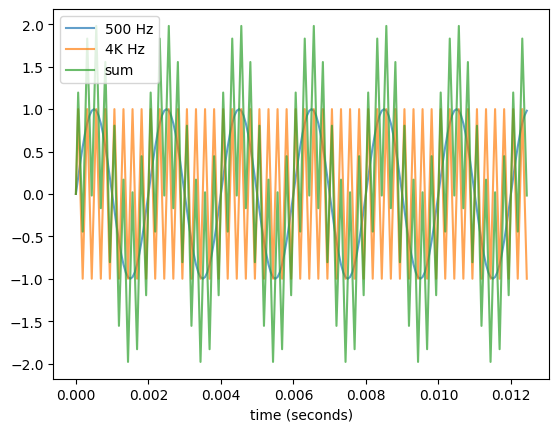

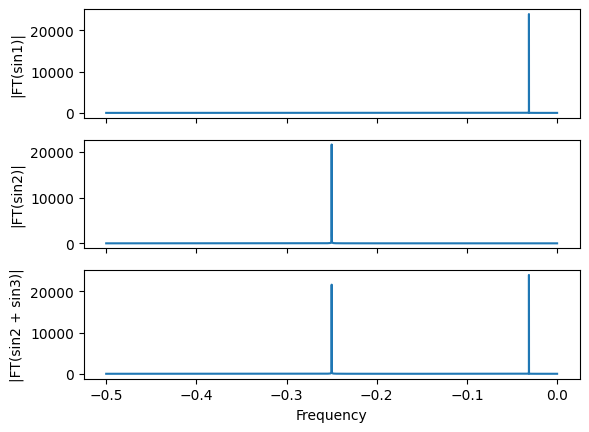

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

def sine_by_freq(t, freq):
    return np.sin(t * freq * 2*np.pi)

# t = 3
N_SECS = 3

sr = 16000

fs = 1 / float(sr)
t = np.linspace(0, N_SECS, N_SECS * sr)

FREQ1 = 500
sin1 = sine_by_freq(t, FREQ1)

FREQ2 = 4000
sin2 = sine_by_freq(t, FREQ2)

N_SAMPLES_TO_PLOT = 200
t_start = t[:N_SAMPLES_TO_PLOT]
plt.plot(t_start, sin1[:N_SAMPLES_TO_PLOT], label="500 Hz", alpha=0.7)
plt.plot(t_start, sin2[:N_SAMPLES_TO_PLOT], label="4K Hz", alpha=0.7)
plt.plot(t_start, sin1[:N_SAMPLES_TO_PLOT] + sin2[:N_SAMPLES_TO_PLOT], label="sum", alpha=0.7)
plt.xlabel("time (seconds)")
plt.legend(loc="best")



fft1 = np.fft.fft(sin1)
fft2 = np.fft.fft(sin2)
fft3 = np.fft.fft(sin2+sin1)
freqs = np.fft.fftfreq(len(sin1))

fig, ax = plt.subplots(3, 1, sharex=True)

len_to_cut = int(len(sin1)/2)

ax[0].plot(freqs[len_to_cut:], abs(fft1)[len_to_cut:])
ax[0].set_ylabel('|FT(sin1)|')

ax[1].plot(freqs[len_to_cut:], abs(fft2)[len_to_cut:])
ax[1].set_ylabel('|FT(sin2)|')

ax[2].plot(freqs[len_to_cut:], abs(fft3)[len_to_cut:])
ax[2].set_xlabel('Frequency')
ax[2].set_ylabel('|FT(sin2 + sin3)|')

plt.show()


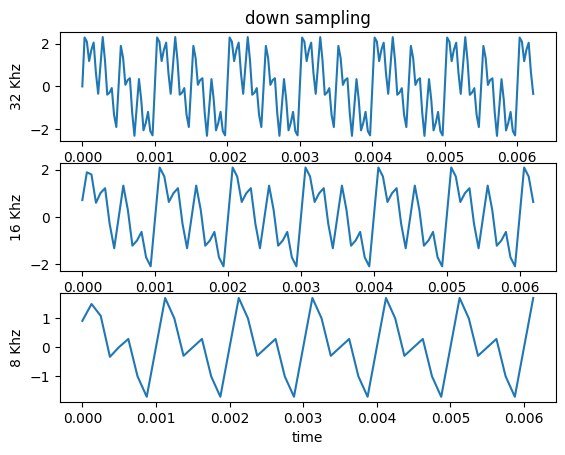

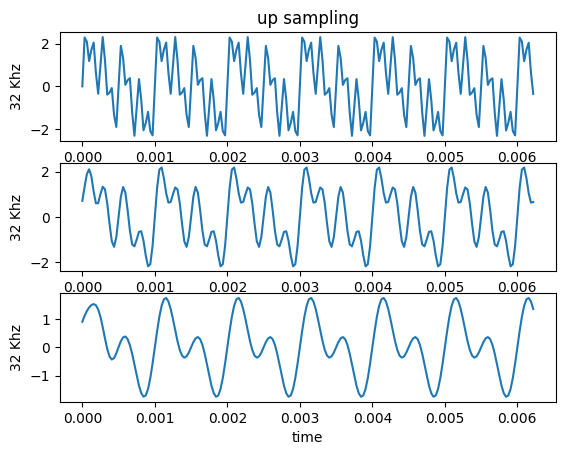

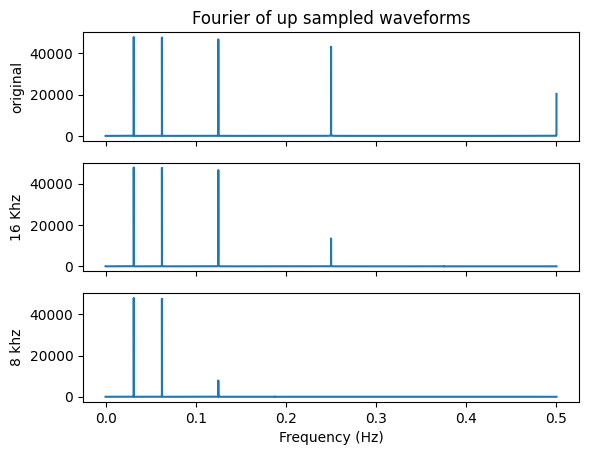

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchaudio

def sine_by_i(duration, i):
    return np.sin(duration * 2 * np.pi* 2**i * 1000)

def resample(signal, new_fs, old_fs):
    signal_tensor = torch.from_numpy(signal).unsqueeze(0)
    resample_transform = torchaudio.transforms.Resample(old_fs, new_fs)
    resample_transform.type('torch.DoubleTensor')
    downsampled_signal_tensor = resample_transform(signal_tensor)
    downsampled_signal = downsampled_signal_tensor.numpy()[0]
    return downsampled_signal

seconds = 3
sr = 32000
sr16 = 16000
sr8 = 8000
N_SAMPLES_TO_PLOT = 200
t = np.linspace(0, seconds, seconds * sr)

sin_arrays = list()
for i in range(5):
    sin_arrays.append(sine_by_i(t, i))
sin_sum = np.sum(sin_arrays, axis=0)


unsampled16 = resample(sin_sum, sr16, sr)
time16 = np.linspace(0, seconds, seconds * sr16)

unsampled8 = resample(sin_sum, sr8, sr)
time8 = np.linspace(0, seconds, seconds * sr8)

fig, ax = plt.subplots(3, 1)

ax[0].plot(t[:N_SAMPLES_TO_PLOT], sin_sum[:N_SAMPLES_TO_PLOT])
ax[0].set_title("down sampling")
ax[0].set_ylabel('32 Khz')

ax[1].plot(time16[:N_SAMPLES_TO_PLOT//2], unsampled16[:N_SAMPLES_TO_PLOT//2])
ax[1].set_ylabel('16 Khz')

ax[2].plot(time8[:N_SAMPLES_TO_PLOT//4], unsampled8[:N_SAMPLES_TO_PLOT//4])
ax[2].set_xlabel('time')
ax[2].set_ylabel('8 Khz')

plt.show()


upsampled16 = resample(unsampled16, sr, sr16)
upsampled8 = resample(unsampled8, sr, sr8)

fig, ax = plt.subplots(3, 1)
ax[0].set_title("up sampling")

ax[0].plot(t[:N_SAMPLES_TO_PLOT], sin_sum[:N_SAMPLES_TO_PLOT])
ax[0].set_ylabel('32 Khz')

ax[1].plot(t[:N_SAMPLES_TO_PLOT], upsampled16[:N_SAMPLES_TO_PLOT])
ax[1].set_ylabel('32 Khz')

ax[2].plot(t[:N_SAMPLES_TO_PLOT], upsampled8[:N_SAMPLES_TO_PLOT])
ax[2].set_xlabel('time')
ax[2].set_ylabel('32 Khz')


plt.show()

fft1 = np.fft.fft(sin_sum)
fft2 = np.fft.fft(upsampled16)
fft3 = np.fft.fft(upsampled8)
freqs = np.fft.fftfreq(len(fft1))

fig, ax = plt.subplots(3, 1, sharex=True)

ax[0].set_title("Fourier of up sampled waveforms")

len_to_cut = int(len(fft1) / 2)

ax[0].plot(freqs[:len_to_cut], abs(fft1)[:len_to_cut])
ax[0].set_ylabel('original')

ax[1].plot(freqs[:len_to_cut], abs(fft2)[:len_to_cut])
ax[1].set_ylabel('16 Khz')

ax[2].plot(freqs[:len_to_cut], abs(fft3)[:len_to_cut])
ax[2].set_xlabel('Frequency (Hz)')
ax[2].set_ylabel('8 khz')
plt.show()

In [3]:
import os
import librosa
import scipy
import numpy as np
PHONE_SOUNDS_DIR = "phone_digits_8k"


def label_from_filename(filename):
    return filename.split(".")[-2]


def find_fft_peaks(y):
    window_size = len(y)
    Y = librosa.stft(y=y, n_fft=window_size)  # coeff_per_freq, n_windows
    n_freqs, n_windows = Y.shape

    # look at the peaks of the fft magnitude of the middle window
    mid_window_mag = np.abs(Y[:, n_windows // 2])
    peaks = scipy.signal.find_peaks(mid_window_mag, threshold=5)
    return tuple(peaks[0])


def create_peaks_to_digits_dict():
    peaks_to_digit = {}
    for wav_file in os.listdir(PHONE_SOUNDS_DIR):
        if not wav_file.endswith(".wav"):
            print("non wav file. skipping")
            continue

        # load wav
        y, sr = librosa.load(f"{PHONE_SOUNDS_DIR}/{wav_file}")
        digit_name = label_from_filename(wav_file)

        # fill peaks to digit
        # using the magnitude peaks of the signal's fft
        peaks_to_digit[find_fft_peaks(y)] = digit_name

    return peaks_to_digit


def classify_digits_and_print(peaks2digit):
    for wav_file in os.listdir(PHONE_SOUNDS_DIR):
        if not wav_file.endswith(".wav"):
            print("non wav file. skipping")
            continue

        # load wav
        y, sr = librosa.load(f"{PHONE_SOUNDS_DIR}/{wav_file}")
        label = label_from_filename(wav_file)

        # predict label
        predicted_label = peaks2digit[find_fft_peaks(y)]

        # print
        print(f"expected label: {label}  predicted label: {predicted_label}")


peaks2digit = create_peaks_to_digits_dict()
classify_digits_and_print(peaks2digit)

expected label: phone_5  predicted label: phone_5
expected label: phone_4  predicted label: phone_4
expected label: phone_6  predicted label: phone_6
expected label: phone_7  predicted label: phone_7
expected label: phone_11  predicted label: phone_11
expected label: phone_3  predicted label: phone_3
expected label: phone_2  predicted label: phone_2
expected label: phone_10  predicted label: phone_10
expected label: phone_0  predicted label: phone_0
expected label: phone_1  predicted label: phone_1
expected label: phone_9  predicted label: phone_9
expected label: phone_8  predicted label: phone_8
